#📌 Extracão

In [1]:
import pandas as pd

# URL com os dados JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"


df_raw = pd.read_json(url)

df_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [2]:
# Ver estrutura geral do DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
# Muitas colunas estão aninhadas, é necessário separar elas:

df_customer = pd.json_normalize(df_raw['customer'])
df_phone = pd.json_normalize(df_raw['phone'])
df_internet = pd.json_normalize(df_raw['internet'])
df_account = pd.json_normalize(df_raw['account'])

# Agora juntar todas as partes com as colunas principais para ficar igual nosso dicionário de dados
df = pd.concat([
    df_raw[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [4]:
# Verificar valores unicos de cada coluna
colunas_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for coluna in colunas_categoricas:
    print(f"\nValores únicos em '{coluna}':")
    print(df[coluna].unique())


Valores únicos em 'gender':
['Female' 'Male']

Valores únicos em 'SeniorCitizen':
[0 1]

Valores únicos em 'Partner':
['Yes' 'No']

Valores únicos em 'Dependents':
['Yes' 'No']

Valores únicos em 'PhoneService':
['Yes' 'No']

Valores únicos em 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos em 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos em 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos em 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos em 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos em 'TechSupport':
['Yes' 'No' 'No internet service']

Valores únicos em 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores únicos em 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores únicos em 'Contract':
['One year' 'Month-to-month' 'Two year']

Valores únicos em 'PaperlessBilling':
['Yes' 'No']

Valores únicos em 'PaymentMethod':
['Mailed check' 'Electronic check' 'Credit card (autom

In [5]:
# Verificar nulos em cada coluna:
print("Qtd Nulos", df.isnull().sum())

Qtd Nulos customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [6]:
#Verificar duplicidades
print("Qtd duplicidades", df.duplicated().sum())

Qtd duplicidades 0


In [7]:
# Verificar vazio/ em branco
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Transformando a coluna Churn, para remover vazios:

df = df[df['Churn'].str.strip() != '']
print("Qtd linhas restantes em 'Churn':", len(df))

Qtd linhas restantes em 'Churn': 7043


In [10]:
# Convertendo a coluna Charges para tipo float

df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].dtype

/tmp/ipython-input-10-3735385968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


dtype('float64')

In [11]:
# Verificar novamente vazio/ em branco após mudanças:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [12]:
# Criando a coluna Contas_Diarias:

df['Contas_Diarias'] = ((df['Charges.Total'] / df['tenure'])/30).round(2)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.97


In [13]:
# Verificar média, mediana e desvio padrão

df[['tenure', 'Charges.Total', 'Charges.Monthly']].describe()


,tenure,Charges.Total,Charges.Monthly
count,7043.000000,7032.000000,7043.000000
mean,32.371149,2283.300441,64.761692
std,24.559481,2266.771362,30.090047
min,0.000000,18.800000,18.250000
25%,9.000000,401.450000,35.500000
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.850000
max,72.000000,8684.800000,118.750000


#📊 Carga e análise

In [14]:
import plotly.express as px

In [15]:
# Gráfico de pizza pra ver a % de evasão
fig = px.pie(
    df,
    names='Churn',
    title='Proporção de evasão dos Clientes',
    hole=0.4  # donut chart opcional
)
fig.show()



In [16]:

# Contagem de churn
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Quantidade']

# Gráfico com cores por categoria
fig = px.bar(
    churn_counts,
    x='Churn',
    y='Quantidade',
    text='Quantidade',
    color='Churn',  # adiciona cor por categoria
    title='Contagem de Clientes por Situação de Evasão'
)
fig.update_traces(textposition='outside')
fig.show()


In [17]:
## Gráfico para comparar a evasão pelo gênero dos clientes

df_grouped = df.groupby(['gender', 'Churn']).size().reset_index(name='count')

fig = px.bar(
    df_grouped,
    x='gender',
    y='count',
    labels={'gender': 'Gênero', 'count': 'Qtd Clientes'},
    color='Churn',
    title='Contagem de Evasão por Gênero',
    barmode='group',
    color_discrete_map={
        'Yes': '#d62728',
        'No': '#1f77b4'
    }
)
fig.update_layout(template='plotly_white')
fig.show()





In [18]:
## Gráfico para comparar a evasão pelo tipo de contrato dos clientes

df_grouped_contract = df.groupby(['Contract', 'Churn']).size().reset_index(name='count')

fig_contract = px.bar(
    df_grouped_contract,
    x='Contract',
    y='count',
    color='Churn',
    barmode='group',
    title='Contagem de Evasão por Tipo de Contrato',
    labels={'Contract': 'Tipo de Contrato', 'count': 'Quantidade de Clientes'},
    color_discrete_map={'Yes': '#d62728', 'No': '#1f77b4'}
)
fig_contract.update_layout(template='plotly_white')
fig_contract.show()


In [19]:
## Gráfico para comparar a evasão pela forma de pagamento dos clientes

df_grouped_payment = df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')

fig_payment = px.bar(
    df_grouped_payment,
    x='PaymentMethod',
    y='count',
    color='Churn',
    barmode='group',
    title='Contagem de Evasão por Método de Pagamento',
    labels={'PaymentMethod': 'Método de Pagamento', 'count': 'Quantidade de Clientes'},
    color_discrete_map={'Yes': '#d62728', 'No': '#1f77b4'}
)
fig_payment.update_layout(template='plotly_white')
fig_payment.show()


In [20]:
# Tempo de contrato por Evasão
fig_tenure = px.box(
    df,
    x='Churn',
    y='tenure',
    color='Churn',
    title='Distribuição do Tempo de Contrato por Evasão',
    labels={'tenure': 'Meses de Contrato'},
    color_discrete_map={'Yes': '#d62728', 'No': '#1f77b4'}
)
fig_tenure.update_layout(template='plotly_white')
fig_tenure.show()


In [21]:
# Histograma de distribuição do valor mensal X Evasão
fig_monthly_hist = px.histogram(
    df,
    x='Charges.Monthly',
    color='Churn',
    nbins=30,
    barmode='overlay',
    title='Distribuição do Valor Mensal por Evasão',
    labels={'Charges.Monthly': 'Valor Mensal (R$)'},
    color_discrete_map={'Yes': '#d62728', 'No': '#1f77b4'},
    opacity=0.6
)
fig_monthly_hist.update_layout(template='plotly_white')
fig_monthly_hist.show()


In [25]:
# Total Gasto Vs Tempo de Contrato Vs Evasão
fig_scatter = px.scatter(
    df,
    x='tenure',
    y='Charges.Total',
    color='Churn',
    title='Total Gasto vs Tempo de Contrato por Evasão',
    labels={'tenure': 'Meses de Contrato', 'Charges.Total': 'Total Gasto (R$)'},
    color_discrete_map={'Yes': '#d62728', 'No': '#1f77b4'},
    opacity=0.6
)
fig_scatter.update_layout(template='plotly_white')
fig_scatter.show()



#📄Relatorio Final

## **Introdução**

A evasão de clientes (Evasão) é um dos principais desafios enfrentados pelas empresas do setor de telecomunicações. Com margens cada vez mais apertadas e concorrência acirrada, entender os fatores que levam um cliente a cancelar seus serviços é essencial para a tomada de decisões estratégicas.
Neste estudo, exploramos um conjunto de dados da TelecomX com o objetivo de:

•	Identificar padrões associados à evasão;

•	Avaliar o perfil dos clientes que permanecem ou cancelam;

•	Fornecer insights práticos para reduzir a evasão.


## **Limpeza e Tratamento de Dados**

**Importação e Normalização:**

    •	Os dados foram carregados a partir de um arquivo JSON disponível em uma URL pública.

    •	A estrutura era aninhada, exigindo o uso de pd.json_normalize para separar em partes


**Junção e Padronização:**

    •	Todas as partes foram consolidadas em um único DataFrame principal com a coluna Evasão.

    •	Conversão da coluna Charges.Total para tipo float.

    •	Remoção de valores vazios ou em branco na coluna Evasão.

    •	Criação da nova coluna Contas_Diarias, representando o valor médio diário pago por cliente.


**Checagens:**

    •	Verificação de valores nulos, duplicados e campos em branco.

    •	Análise dos tipos de variáveis para categóricas e numéricas.


## **Análise Exploratória de Dados**

Foram utilizadas visualizações com Plotly para entender o comportamento dos clientes em relação à evasão:

### Comparações por Variáveis Categóricas

Proporção Geral de Evasão:

•	Gráfico de Pizza revelou que cerca de 26,5% dos clientes cancelaram o serviço, enquanto 73,5% permaneceram.


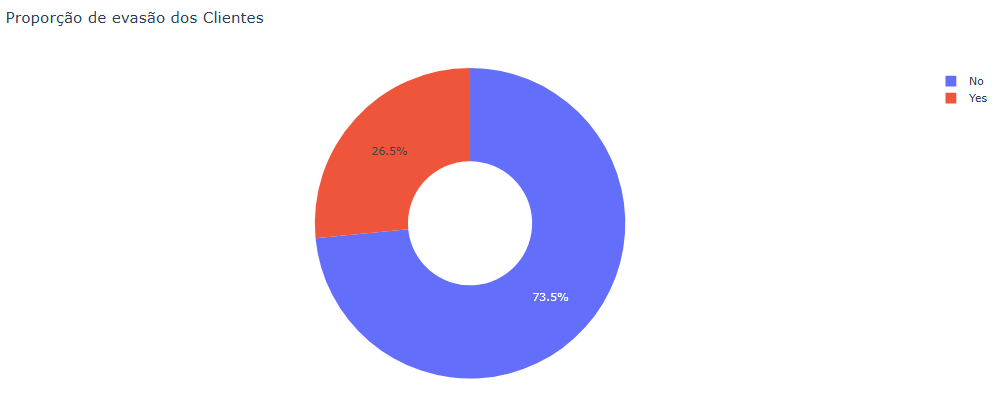









Gênero x Evasão

•	A evasão é sem diferenças significativas entre homens e mulheres.

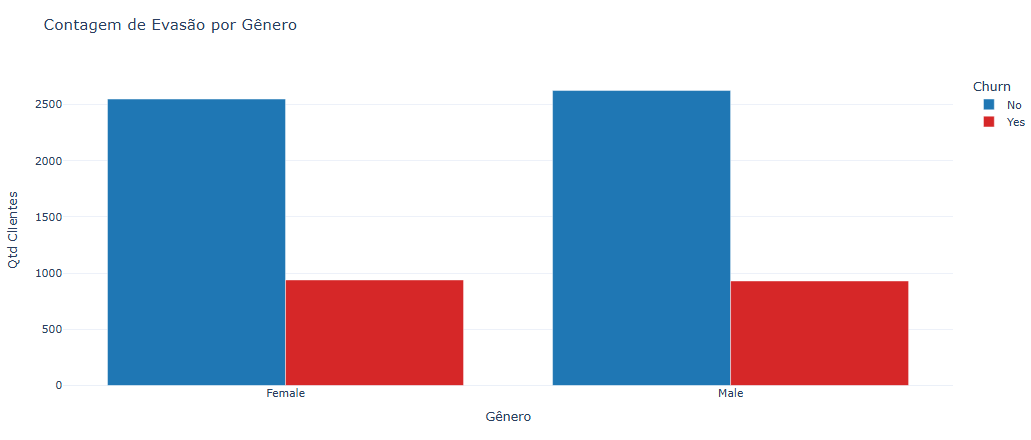

Tipo de Contrato x Evasão

•	Clientes com contrato mensal apresentam alta taxa de evasão, enquanto contratos de 1 ou 2 anos têm evasão muito menor.

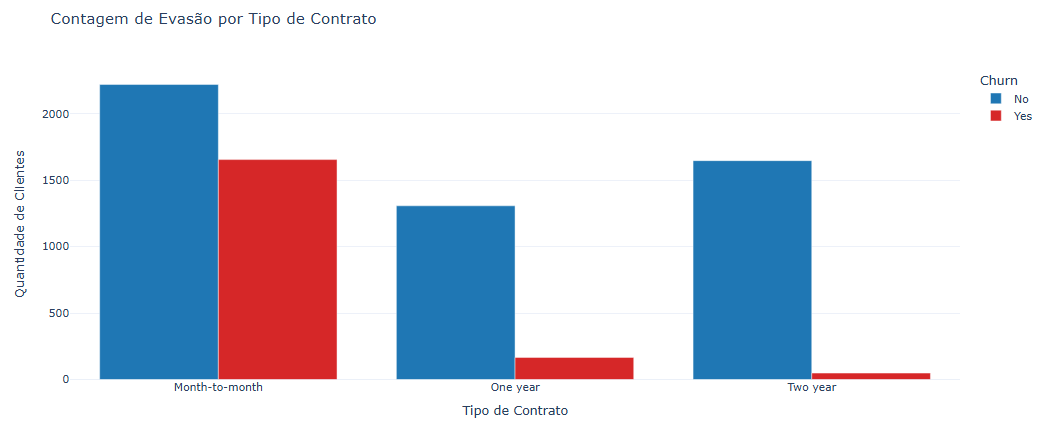


Forma de Pagamento x Evasão

•	Métodos como "Electronic check" apresentam os maiores índices de evasão.

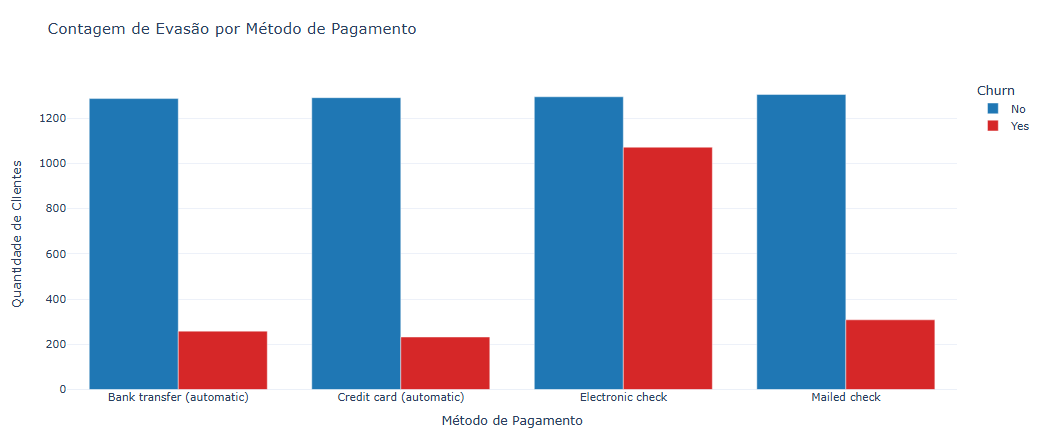

### Análise de Variáveis Numéricas

Tempo de Contrato (tenure) x Evasão

•	Boxplot indica que clientes que cancelaram tendem a ter menor tempo de contrato (início recente).

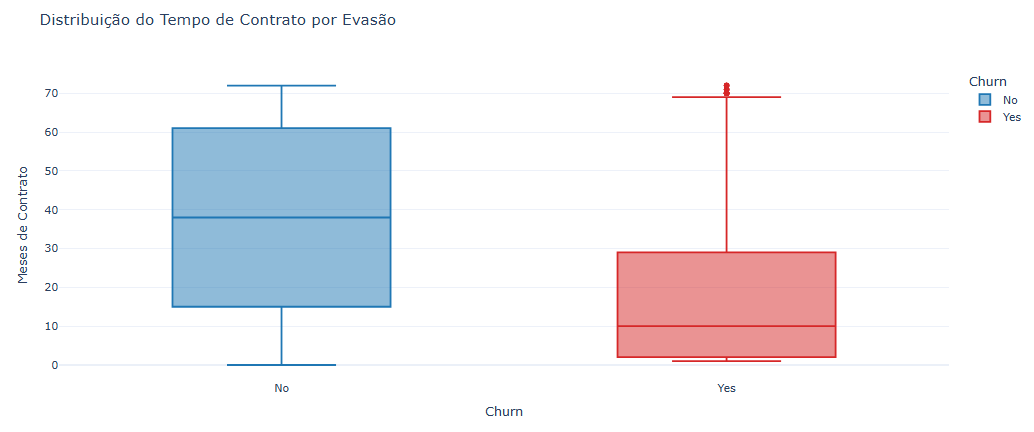


Charges.Monthly x Evasão (Histograma)

•	Clientes que pagam valores mensais mais altos têm levemente maior propensão à evasão.

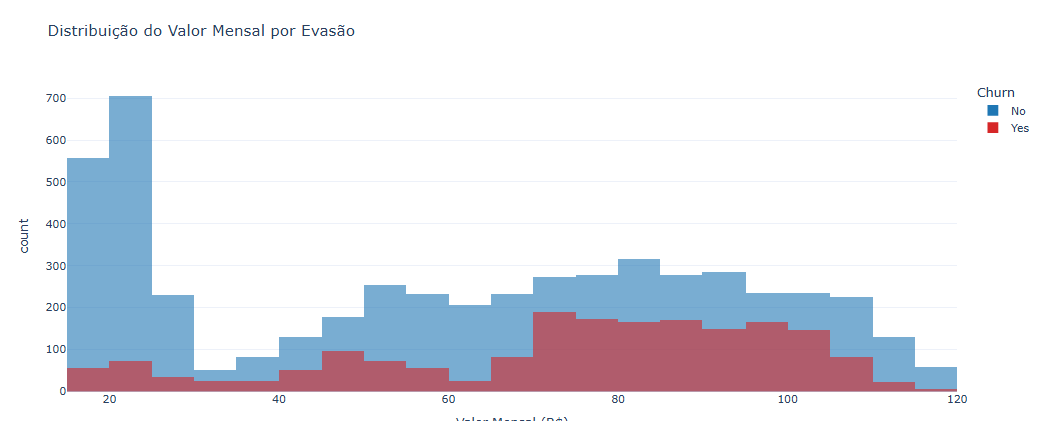


Charges.Total vs Tenure (Scatter)

•	Clientes com baixo tempo de contrato e baixo total gasto concentram a maioria dos casos de evasão — indicando cancelamentos logo após o início.

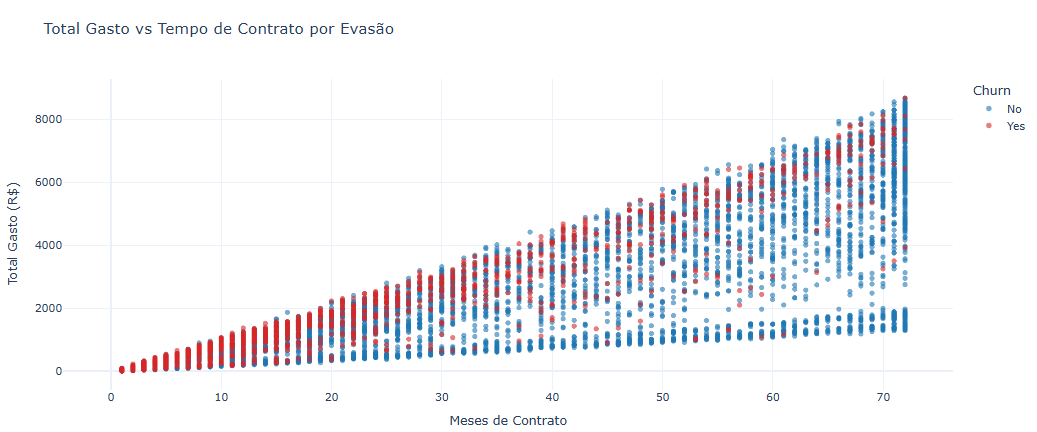

## **Conclusões e Insights**

•	Clientes com contrato mensal são mais propensos à evasão — possível reflexo da flexibilidade e menor fidelização.

•	O método de pagamento "Electronic check" está fortemente associado a cancelamentos — pode indicar menor digitalização ou menor vínculo com a empresa.

•	Clientes com pouco tempo de casa (tenure) tendem a desistir rapidamente — o período inicial é crítico.

•	O valor total gasto (Charges.Total) é consideravelmente menor entre os que cancelaram, refletindo menor fidelização.


## **Recomendações**

1.	Incentivar contratos de longo prazo:
    
    	* Oferecer descontos ou benefícios exclusivos para contratos anuais ou bienais pode ajudar a reduzir o evasão.

2.	Ações de retenção no primeiro mês:

     * Focar em experiência do cliente, onboarding e atendimento nos primeiros 60 dias pode evitar cancelamentos precoces.

3.	Monitorar clientes com pagamento via "Electronic check":

      * Oferecer migração facilitada para métodos digitais.
      * Avaliar se há barreiras tecnológicas para esse grupo.

4.	Análise contínua de novos clientes:

      * Criar alertas de evasão para perfis com alto risco (curto tempo, alto valor mensal, método de pagamento sensível).
